Total images: 290, Total masks: 290
Image shape: (551, 893, 3), Mask shape: (551, 893)


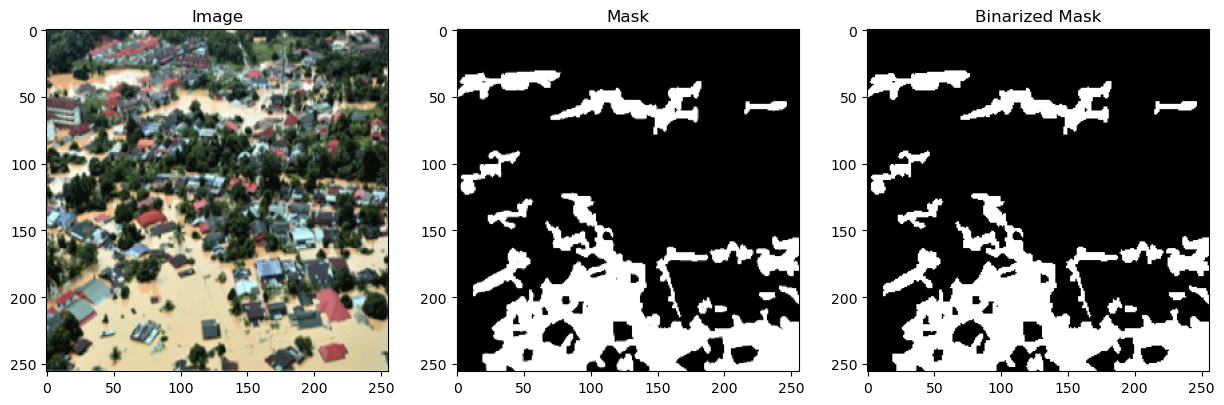

Unique mask values: [0 1]


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

IMAGE_DIR = r"C:\Users\dilip\ML\intern report\ml_model\data\raw\Image"
MASK_DIR = r"C:\Users\dilip\ML\intern report\ml_model\data\raw\Mask"

image_files = sorted([f for f in os.listdir(IMAGE_DIR) if f.endswith('.jpg')])
mask_files = sorted([f for f in os.listdir(MASK_DIR) if f.endswith('.png')])

print(f"Total images: {len(image_files)}, Total masks: {len(mask_files)}")

# Read sample
idx = 0
image = cv2.imread(os.path.join(IMAGE_DIR, image_files[idx]))
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

mask = cv2.imread(os.path.join(MASK_DIR, mask_files[idx]), cv2.IMREAD_GRAYSCALE)

print(f"Image shape: {image.shape}, Mask shape: {mask.shape}")

# Resize
TARGET_SIZE = (256, 256)
image_resized = cv2.resize(image, TARGET_SIZE, interpolation=cv2.INTER_AREA)
mask_resized = cv2.resize(mask, TARGET_SIZE, interpolation=cv2.INTER_NEAREST)

# Normalize image
image_normalized = image_resized / 255.0

# Binarize mask
mask_binarized = (mask_resized > 127).astype(np.uint8)

# Visualize
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
plt.title("Image")
plt.imshow(image_resized)

plt.subplot(1,3,2)
plt.title("Mask")
plt.imshow(mask_resized, cmap='gray')

plt.subplot(1,3,3)
plt.title("Binarized Mask")
plt.imshow(mask_binarized, cmap='gray')
plt.show()

print(f"Unique mask values: {np.unique(mask_binarized)}")